# Load model

In [1]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
import os
import glob
import shutil
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras import callbacks

In [2]:
import os
# os.path.abspath('/media/tohn/SSD/Efficient_USAI')
os.chdir('/media/tohn/SSD/FP-D_Nor_ABnor_Network')
!ls
  #choose gpu on processing 
os.environ["CUDA_VISIBLE_DEVICES"]="0" # second gpu  

content


In [3]:
import os
%cd content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
  !git clone https://github.com/Tony607/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/media/tohn/SSD/FP-D_Nor_ABnor_Network/content
/media/tohn/SSD/FP-D_Nor_ABnor_Network/content/efficientnet_keras_transfer_learning


In [4]:
import sys
sys.path.append('/media/tohn/SSD/Sub_Efficient_USAI/content/efficientnet_keras_transfer_learning')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

Using TensorFlow backend.


In [5]:
#load model 
from tensorflow.keras.models import load_model
model = load_model("/media/tohn/SSD/Sub_Efficient_USAI/content/efficientnet_keras_transfer_learning/models/Sub_b0_c11_250_R2.h5")

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 5, 5, 1280)        4049564   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
_________________________________________________________________
fc_out (Dense)               (None, 13)                16653     
Total params: 4,066,217
Trainable params: 798,093
Non-trainable params: 3,268,124
_________________________________________________________________


In [7]:
model.pop()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnet-b0 (Model)      (None, 5, 5, 1280)        4049564   
_________________________________________________________________
gap (GlobalMaxPooling2D)     (None, 1280)              0         
_________________________________________________________________
dropout_out (Dropout)        (None, 1280)              0         
Total params: 4,049,564
Trainable params: 781,440
Non-trainable params: 3,268,124
_________________________________________________________________


### สร้าง Network ใหม่ 

In [9]:
model2 = models.Sequential()
model2.add(model)
model2.add(layers.Dense(1, activation='sigmoid', name="fc_out"))        #class --> 2
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1280)              4049564   
_________________________________________________________________
fc_out (Dense)               (None, 1)                 1281      
Total params: 4,050,845
Trainable params: 782,721
Non-trainable params: 3,268,124
_________________________________________________________________


### จัดการ data 

In [10]:
import pandas as pd
df = pd.read_csv (r'/home/yupaporn/EfficientNet_USAI/final_training_table.csv')
# df =df[df['Path Crop'] != 'None']
# df.dropna()
df

,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop
0,2053,2053,40,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
1,3682,3682,194,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2,2000,2000,59,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
3,3090,3090,105,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
4,2001,2001,14,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
5,2594,2594,93,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
6,2586,2586,84,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
7,2031,2031,35,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
8,3667,3667,173,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
9,3659,3659,180,P3,P31,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...


In [18]:
#select data 
df1 = df.loc[df['Abs Position']  == 'P7']
df1

,Unnamed: 0,Unnamed: 0.1,Case,Abs Position,Sub Position,Class,Sub_class,Path Full,Path Crop
2124,3410,3410,108,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2125,2407,2407,60,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
2126,3430,3430,143,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2127,2862,2862,77,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2128,3407,3407,103,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2129,2871,2871,85,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2130,4057,4057,194,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2131,2357,2357,29,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...,/media/tohn/HDD/VISION_dataset/USAI/croppedPre...
2132,3426,3426,133,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...
2133,4023,4023,168,P7,P71,Normal,Normal,/media/tohn/HDD/VISION_dataset/USAI/US images ...,/media/tohn/HDD/VISION_dataset/USAI/US images ...


In [19]:
msk = np.random.rand(len(df1)) < 0.9
test = df1[~msk] #4
train= df1[msk]#94

In [20]:
print(test.shape)
print(train.shape)
print(df1.shape)

(10, 9)
(88, 9)
(98, 9)


#### การเเบ่งข้อมูล train/validation/test sets 

In [21]:
# The directory where we will
base_dir = './data/views'
os.makedirs(base_dir, exist_ok=True)

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.makedirs(train_dir, exist_ok=True)

validation_dir = os.path.join(base_dir, 'validation')
os.makedirs(train_dir, exist_ok=True)

In [22]:
# Directory with our training cat pictures
train_Nor_dir = os.path.join(train_dir, 'Normal')
os.makedirs(train_Nor_dir, exist_ok=True)
# Directory with our training cat pictures
train_ABn_dir = os.path.join(train_dir, 'ABnormal')
os.makedirs(train_ABn_dir, exist_ok=True)

# Directory with our training cat pictures
validation_Nor_dir = os.path.join(validation_dir, 'Normal')
os.makedirs(validation_Nor_dir, exist_ok=True)
# Directory with our training cat pictures
validation_ABn_dir = os.path.join(validation_dir, 'ABnormal')
os.makedirs(validation_ABn_dir, exist_ok=True)

#Path images of train
Nor_train = train[train['Class']=='Normal']
Nor_path_train = Nor_train['Path Crop'].tolist() 
ABn_train = train[train['Class']=='Abnormal']
ABn_path_train = ABn_train['Path Crop'].tolist() 

Nor_validation = test[test['Class']=='Normal']
Nor_path_validation = Nor_validation['Path Crop'].tolist() 
ABn_validation = test[test['Class']=='Abnormal']
ABn_path_validation= ABn_validation['Path Crop'].tolist() 

#Train
fnames = Nor_path_train  
for fname in fnames:
    dst = os.path.join(train_Nor_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)
    
fnames = ABn_path_train  
for fname in fnames:
    dst = os.path.join(train_ABn_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)
  
 #Validation
fnames = Nor_path_validation 
for fname in fnames:
    dst = os.path.join(validation_Nor_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)

fnames = ABn_path_validation
for fname in fnames:
    dst = os.path.join(validation_ABn_dir, os.path.basename(fname))
    if os.path.exists(dst):
        dst = dst+'cp.jpg'
    shutil.copyfile(fname, dst)

In [23]:
print('Train images total : ',len(Nor_path_train)+len(ABn_path_train))
print('Validation images total : ',len(ABn_path_validation)+len(Nor_path_validation))
print('Total images : ',len(Nor_path_train)+len(ABn_path_train)+len(ABn_path_validation)+len(Nor_path_validation))

Train images total :  88
Validation images total :  10
Total images :  98


#### Hyper parameters  

In [17]:
batch_size = 50 

width = 150 
height = 150 
input_shape = (height, width, 3) #ขนาด image enter

epochs = 20  #จำนวนรอบในการ Train
NUM_TRAIN = 2251  # จำนวนภาพ Train
NUM_TEST = 257 #จำนวนภาพ Test
dropout_rate = 0.2 #คือการปิดบาง Node หรือเรียกว่าทำการ Drop Out ไป ซึ่งขึ้นกับการตั้งค่าว่าจะให้ลืมไปกี่เปอร์เซนต์ดี ช่วยในการแก้ปัญหา Overfitting

#### Setting data augmentation 

In [18]:
# data augmentation เพื่อลดโอกาสการเกิด overfitting

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, # image input 0-255 --> 0-1 เปลี่ยนค่าสี
      rotation_range=40, # หมุนภาพในองศา
      width_shift_range=0.2, #เปลี่ยนความกว้าง
      height_shift_range=0.2, #ปลี่ยนความสูง
      shear_range=0.2, #ทำให้ภาพเบี้ยว
      zoom_range=0.2, #ซุม image มากสุด 20%
      horizontal_flip=False, #พลิกภาพแบบสุ่มตามแนวนอน
      fill_mode='nearest') 

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to target height and width.
        target_size=(height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(height, width),
        batch_size=batch_size,
        color_mode= 'rgb',
        class_mode='binary')

Found 786 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


#### Training

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

#history คือตัวแปรที่จะทำการเก็บประวัติการ Train Model ของเรา
#คำสั่ง Train
history = model2.fit_generator(
      train_generator,#โหลดdataเข้ามา
      steps_per_epoch= NUM_TRAIN //batch_size,
      epochs=epochs,
      validation_data=validation_generator, #validation_data=(x_valid, y_valid): ใส่ data ที่เราแยกไว้เพื่อดูผล Model ว่าเกิด Overfitting เริ่มที่จุดใด
      validation_steps= NUM_TEST //batch_size,
      verbose=1, #โชว์ผลลัพธ์ 0:ปิด
      use_multiprocessing=True, #ใช้ GPU หลายตัว
      workers=1) #ทำพร้อมกันที่ละ 4 ตัว

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
13/45 [=======>......................] - ETA: 19s - loss: 0.9453 - acc: 0.5975

# Test Predict

In [18]:
import pandas as pd
import os

In [20]:
  #choose gpu on processing 
os.environ["CUDA_VISIBLE_DEVICES"]="0" # second gpu  

In [21]:
df0 = pd.read_csv (r'/home/yupaporn/codes/USAI/detail1_350_.csv')
df01 = df0[(df0['Path Crop']!='None' )&(df0['Path Crop']!='Nan')]
#select data 
df02 = df01.loc[df01['Abs Position']  == 'P7']

In [22]:
a = df02[df02['Case'].between(1, 10)]
print(a.shape)
print('Normal: ',a[a['Class']=='Normal'].shape)
print('Abnormal: ',a[a['Class']=='Abnormal'].shape)
# a1 = a['Path Crop'].tolist() 
# a1[0]

(28, 8)
Normal:  (20, 8)
Abnormal:  (8, 8)


### Load model

In [23]:
import sys
sys.path.append('/media/tohn/SSD/FP-D_Nor_ABnor_Network/content/efficientnet_keras_transfer_learning')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

Using TensorFlow backend.


In [24]:
#load model 
from tensorflow.keras.models import load_model
model = load_model("/media/tohn/SSD/FP-D_Nor_ABnor_Network/content/efficientnet_keras_transfer_learning/models/FP_D_small_v3.h5")

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1280)              4049564   
_________________________________________________________________
fc_out (Dense)               (None, 1)                 1281      
Total params: 4,050,845
Trainable params: 782,721
Non-trainable params: 3,268,124
_________________________________________________________________


### Prediction

In [26]:
width = 150 
height = 150 
input_shape = (height, width, 3) 

In [27]:
from tensorflow.keras.preprocessing import image
import pandas as pd

In [28]:
def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width))
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)
    # Reshape
    x = x.reshape((1,) + x.shape)
    x /= 255.
    result = model.predict([x])[0][0]
    if result > 0.5:
        classs = "Normal"
    else:
        classs = "Abnormal"
        result = 1 - result
    return classs,result
classe =['Normal','Abnormal']
results = list()
# predlist,problist = list(), list()

for i in classe:
    img_path =a[a['Class']==i]['Path Crop'].tolist()
    for j in img_path:
        classs,result = predict_image(j)
        results.append({'2Actual':i,'3Predicted':classs, '4Class_prob':result,'path':j})

In [29]:
result = pd.DataFrame(results)
result

,2Actual,3Predicted,4Class_prob,path
0,Normal,Normal,0.999997,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
1,Normal,Normal,0.999837,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
2,Normal,Normal,0.999817,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
3,Normal,Normal,0.999982,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
4,Normal,Normal,0.999945,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
5,Normal,Normal,0.999907,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
6,Normal,Normal,0.999997,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
7,Normal,Normal,0.999979,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
8,Normal,Normal,0.999995,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...
9,Normal,Normal,0.999011,/media/tohn/HDD/VISION_dataset/USAI/Prelim. Im...


In [30]:
# os.chdir( '/home/yupaporn/codes/USAI/')
# result.to_csv('predict_FP_D.csv')

# Visualization

In [31]:
data_train = result

#เช็คคลาสใน Predicted
pred_class = set(data_train['3Predicted'])
print('Predicted : ',len(pred_class))
print(pred_class)
#เช็คคลาสใน Actual
classe = set(data_train['2Actual'])
print('Actual : ',len(classe))
print(classe)

Predicted :  2
{'Abnormal', 'Normal'}
Actual :  2
{'Abnormal', 'Normal'}


### Confusion matrix

In [32]:
act = data_train['2Actual'].array
pred = data_train['3Predicted'].array

classes =['Abnormal', 'Normal']

In [33]:
import numpy as np
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(act, pred, classes)
# print('fan classifier accuracy = {}%'.format((100.*numpy.trace(cmat))/(numpy.sum(cmat))))
print('fan classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

fan classifier accuracy = 96.42857142857143%


/home/yupaporn/miniconda3/envs/eff/lib/python3.6/site-packages/sklearn/utils/validation.py:71: FutureWarning: Pass labels=['Abnormal', 'Normal'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [34]:
#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
# confusion_matrix(act, pred)
print(classification_report(act, pred))#performance

              precision    recall  f1-score   support

    Abnormal       1.00      0.88      0.93         8
      Normal       0.95      1.00      0.98        20

    accuracy                           0.96        28
   macro avg       0.98      0.94      0.95        28
weighted avg       0.97      0.96      0.96        28



In [35]:
data = {'Predicted' : pred, 'Actual': act}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Predicted'],df['Actual'],rownames=['Predicted'],colnames=['Actual'])
conf_mat

Actual,Abnormal,Normal
Predicted,,
Abnormal,7,0
Normal,1,20


Text(48.5, 0.5, 'Predicted label')

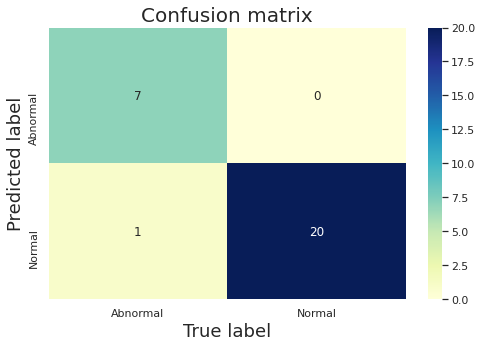

In [36]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(8, 5))

# ax.axhline(0, lw=2.5, color='black')
# ax.axvline(0, lw=2.5, color='black')
ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_xlabel('True label',fontsize=18)
ax.set_ylabel('Predicted label',fontsize=18)


# os.chdir( '/home/yupaporn/EfficientNet_USAI/')
# plt.savefig('ConfusionMatrix.png')

### ROC Curve

In [21]:
import numpy as np
# classes =['P1','P2','P3','P4','P5','P6','P7','P8']
# classes =['P2']
classes =['Abnormal', 'Normal']
threshold = np.arange(0.0, 1.002, 0.001)

TN, FP, FN, TP = list(),list(),list(),list()
precision, recall, ACC, TPR, FPR, SPEC = list(),list(),list(),list(),list(),list()

for i in threshold:
    TN0, FP0, FN0, TP0 = list(),list(),list(),list()
    precision0, recall0, ACC0, TPR0, FPR0, SPEC0 = list(),list(),list(),list(),list(),list()
    
    for j in classes:
        tn,fp,fn,tp = confusion_matrix_all(data_train,j,i) 
        try:
            pre = tp/(tp+fp)
            re= tp/(tp+fn)
            acc = (tp+tn)/(tp+tn+fp+fn)
            tpr = tp/(tp+fn)
            fpr = fp/(fp+tn)
            spec = 1-(tn/(tn+fp))
        except ZeroDivisionError:
            pre,re,acc,tpr,fpr,spec =1,0,0,0,0,0      
            
        TP0.append(tp)
        TN0.append(tn)
        FP0.append(fp)
        FN0.append(fn)
        precision0.append(pre)
        recall0.append(re)
        ACC0.append(acc)
        TPR0.append(re)
        FPR0.append(fpr)       
        SPEC0.append(spec)
        
    precision.append(precision0)
    recall.append(recall0)
    ACC.append(ACC0)
    TPR.append(TPR0)
    FPR.append(FPR0)       
    SPEC.append(SPEC0)

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 

/home/yupaporn/.local/lib/python3.6/site-packages/ipykernel_launcher.py:62: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 

( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1

( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1

( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 1 , 7 )
( 7 , 1 , 0 

( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 7 , 1 , 0 , 20 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 

( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1 , 7 )
(TN,FP,FN,TP)
( 20 , 0 , 2 , 6 )
( 7 , 1 , 0 , 20 )
(TN,FP,FN,TP)
( 8 , 0 , 1 , 19 )
( 20 , 0 , 1

In [22]:
#average per threshold 
precision1,recall1,ACC1,TPR1,FPR1,SPEC1 = list(),list(),list(),list(),list(),list()
from statistics import *
for m in range(0,len(precision)):
    a1 =mean(precision[m])
    a2 =mean(recall[m])
    a3 =mean(ACC[m])
    a4 =mean(TPR[m])
    a5 =mean(FPR[m])
    a6 =mean(SPEC[m])
    
    precision1.append(a1)
    recall1.append(a2)
    ACC1.append(a3)
    TPR1.append(a4)
    FPR1.append(a5)       
    SPEC1.append(a6)   

In [ ]:
#create dataframe
import numpy as np
i = np.arange(len(precision1)) # index for df
roc0 = pd.DataFrame({'Threshold' : pd.Series(threshold, index=i),'Precision' : pd.Series(precision1, index = i),'Recall' : pd.Series(recall1, index = i),'tpr' : pd.Series(TPR1, index = i),'fpr' : pd.Series(FPR1, index = i),'1-Spec' : pd.Series(SPEC1, index = i),  'ACC' : pd.Series(ACC1, index = i)})
roc0 = roc0.fillna(1)

fix_value = [{'Threshold':0.000,'Precision':0.000,'Recall':1.000,'tpr':1.000,'fpr':1.000,'1-Spec':1.000,'ACC':0.000}]
roc0 = roc0.append(fix_value,ignore_index=True,sort=False)
roc0 = roc0.apply(np.roll, shift=1) #move he last row to the first

No handles with labels found to put in legend.


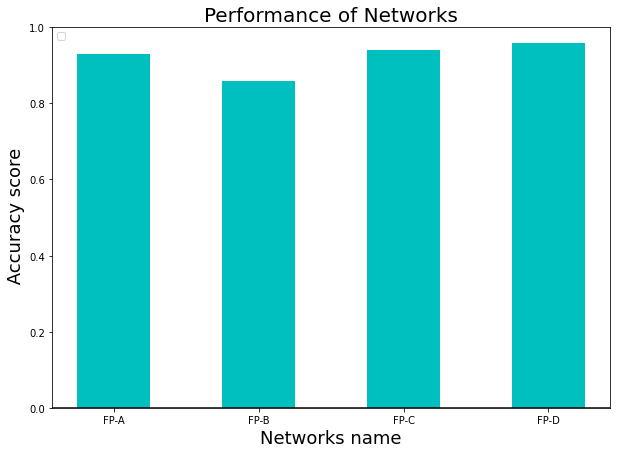

In [17]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
 
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
# Fake dataset
y1 = [0.93,0.86,0.94,0.96]
# y2 = [0.90,0.62,0.57,0.89,0.88,0.00,0.00,0.00]
# y3 = [0.85,0.76,0.66,0.72,0.92,0.00,0.00,0.00]
bars = ('FP-A','FP-B','FP-C','FP-D')
# bars = ('P1','P2','P31','P32','P41','P42','P51','P51','P6','P62','P71','P72','P8')
y_pos = np.arange(len(bars))
 
# Create bars and choose color
plt.bar(y_pos, y1, color = 'C',width=0.5,align='center')
# Add title and axis names
plt.title('Performance of Networks',fontsize=20)
plt.xlabel('Networks name',fontsize=18)
plt.ylabel(' Accuracy score',fontsize=18)
 
# Limits for the Y axis
plt.ylim(0,1)
 
# Create names
plt.xticks(y_pos, bars)

# Show label
plt.legend(loc=2) 
# Show graphic
plt.show()

No handles with labels found to put in legend.


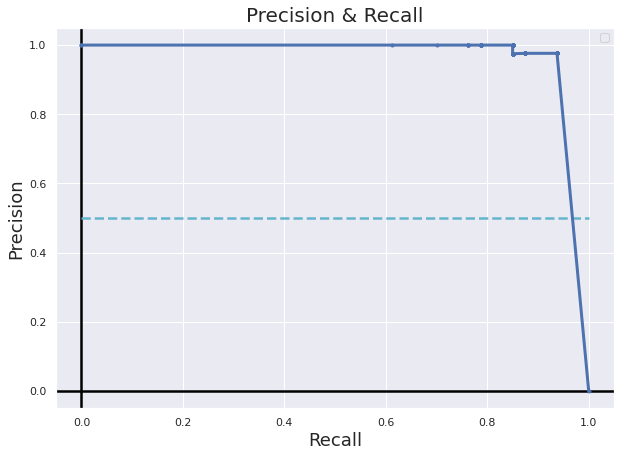

PR AUC (area = 0.97)


In [69]:
import numpy as np
    #Precision & Recall Curve
recall = np.array(roc0['Recall'])
precision = np.array(roc0['Precision'])

import matplotlib.pyplot as plt
from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
# ax.set_facecolor(('w'))
fig.patch.set_facecolor('w')
plt.plot([0, 1], [0.5, 0.5],'c', linestyle='--',lw=2.5)
pyplot.plot(recall, precision, marker='.', lw=lw)
    # axis labels
pyplot.xlabel('Recall',fontsize=18)
pyplot.ylabel('Precision',fontsize=18)
pyplot.title('Precision & Recall',fontsize=20)
    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()


    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(recall, precision)
print('PR AUC (area = %0.2f)' % (auc_score))

No handles with labels found to put in legend.


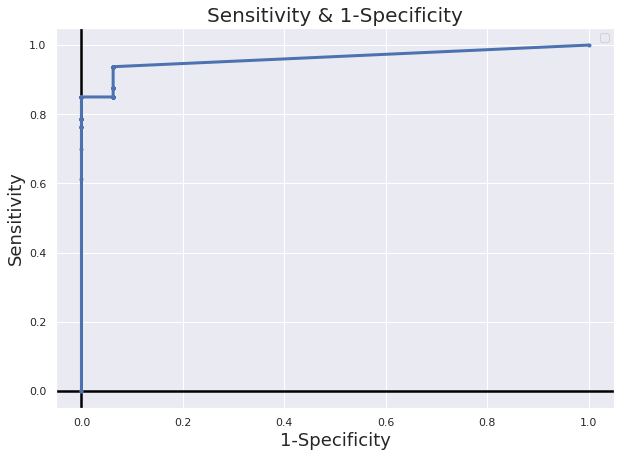

PR AUC (area = 0.96)


In [81]:
    #sen VS spec
import numpy as np
sen= np.array(roc0['tpr'])
spec = np.array(roc0['1-Spec'])

from matplotlib import pyplot
lw = 3
fig, ax = plt.subplots(figsize=(10, 7))
plt.axhline(0, lw=2.5, color='black')
plt.axvline(0, lw=2.5, color='black')
fig.patch.set_facecolor('w')
plt.plot([0, 0],[1, 1],'c', linestyle='--',lw=2.5)
pyplot.plot(spec,sen, marker='.',lw=lw)  

    # axis labels
pyplot.xlabel('1-Specificity',fontsize=18)
pyplot.ylabel('Sensitivity',fontsize=18)
pyplot.title('Sensitivity & 1-Specificity',fontsize=20)

    # show the legend
pyplot.legend()
    # show the plot
pyplot.show()


    # calculate the precision-recall auc
from sklearn.metrics import auc
auc_score = auc(spec, sen)
print('PR AUC (area = %0.2f)' % (auc_score))

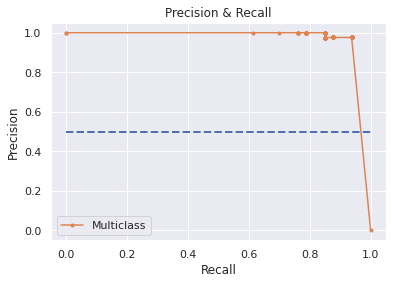

PR AUC (area = 0.97)


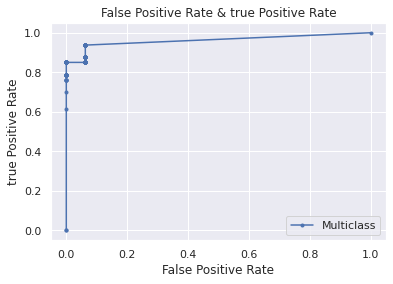

PR ROC (area = 0.96)


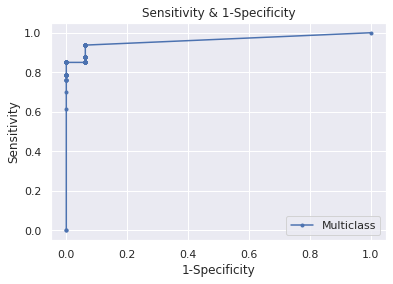

PR AUC (area = 0.96)


In [24]:
plot_roc(roc0)

# Function

In [14]:
def confusion_matrix_all(data_train,classes,threshold):


    #1. manage data  --------------------------------------------------------------------------------------------------------------------------------------------------

    p1 = data_train #Input table
   
    if classes =='Normal':
        act= p1['2Actual'].map({'Normal':1,'Abnormal':0}).values
        pred = p1['3Predicted'].map({'Normal':1,'Abnormal':0}).values
    else:
        act= p1['2Actual'].map({'Normal':0,'Abnormal':1}).values
        pred = p1['3Predicted'].map({'Normal':0,'Abnormal':1}).values

    prob_all = p1['4Class_prob'].to_numpy()

    #2. เงื่อนไข ---------------------------------------------------------------------------------------------------------------------------------------------

    TP,TN,FP,FN,posi_tp,posi_tn,posi_fp,posi_fn = list(), list(), list(), list(),list(), list(), list(), list()
    for i in range(len(act)):
        if act[i] & pred[i]  == 1:
            tp = 1
            po_tp = i
            TP.append(tp)
            posi_tp.append(po_tp)
        elif act[i] == 0: 
            if pred[i]  == 1:
                fp = 1
                po_fp = i
                FP.append(fp)
                posi_fp.append(po_fp)  

        if act[i] == 1: 
            if pred[i]  == 0:
                fn = 1
                po_fn = i
                FN.append(fn)
                posi_fn.append(po_fn) 
        elif act[i] | pred[i]  == 0:
            tn = 1
            po_tn = i
            TN.append(tn)
            posi_tn.append(po_tn)



    print('(',len(TN),',', len(FP),',', len(FN),',', len(TP) ,')')

# 3. threshold ----------------------------------------------------------------

    if  posi_tp or posi_fp  != 0:      
                #Keep only interested TP, FP 
        inter_point = posi_tp+posi_fp
        inter = act[inter_point]
        prob = prob_all[inter_point]

        import numpy as np
        from sklearn.metrics import confusion_matrix

#         threshold = 0
        t = prob >= threshold
        t = np.where(t=='True', 1, t) #repalce True-1,False-0

        tp_new,tn_new,fp_new,fn_new = list(),list(),list(),list()
        for i in range(len(inter)):
            if inter[i] & t[i]  == 1:
                tp0 = 1
                tp_new.append(tp0)

            elif inter[i] == 0: 
                if t[i]  == 1:
                    fp0 = 1
                    fp_new.append(fp0) 

            if inter[i] == 1: 
                if t[i]  == 0:
                    fn0 = 1
                    fn_new.append(fn0)

            elif inter[i] | t[i]  == 0:
                tn0 = 1
                tn_new.append(tn0)  #find  confusion matrix

        if TN.count(1) !=0:
            tn_new = TN.count(1)+tn_new.count(1)
        else : 
            tn_new = tn_new.count(1)    
        if FN.count(1) !=0:
            fn_new = FN.count(1)+fn_new.count(1)
        else :
            fn_new = fn_new.count(1)

        fp_new = fp_new.count(1)
        tp_new = tp_new.count(1)

        print('(TN,FP,FN,TP)')
        print('(',tn_new,',', fp_new,',', fn_new,',', tp_new ,')')

        return tn_new, fp_new, fn_new, tp_new

    else :
        print('(TN,FP,FN,TP)')
        print('(',TN.count(1),',', FP.count(1),',', FN.count(1),',', TP.count(1) ,')')

        return TN.count(1),  FP.count(1), FN.count(1), TP.count(1) 

In [15]:

#Plot ROC
def plot_roc(roc0):
    
    import numpy as np
    #Precision & Recall Curve
    recall = np.array(roc0['Recall'])
    precision = np.array(roc0['Precision'])


    import matplotlib.pyplot as plt
    from matplotlib import pyplot
    lw = 2
    plt.plot([0, 1], [0.5, 0.5], linestyle='--', lw=lw)
    pyplot.plot(recall, precision, marker='.', label='Multiclass')
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    pyplot.title('Precision & Recall')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


    # calculate the precision-recall auc
    from sklearn.metrics import auc
    auc_score = auc(recall, precision)
    print('PR AUC (area = %0.2f)' % (auc_score))

    #_______________________________________________________________________________________________

    #FPR VS TPR

    import numpy as np
    tpr= np.array(roc0['tpr'])
    fpr = np.array(roc0['fpr'])

    from matplotlib import pyplot

    pyplot.plot(fpr, tpr, marker='.', label='Multiclass')  #กลับด้านทำไม?????
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('true Positive Rate')
    pyplot.title('False Positive Rate & true Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


    # calculate the precision-recall auc
    from sklearn.metrics import auc
    auc_score = auc(fpr, tpr)
    print('PR ROC (area = %0.2f)' % (auc_score))

    #_______________________________________________________________________________________________

    #sen VS spec

    import numpy as np
    sen= np.array(roc0['tpr'])
    spec = np.array(roc0['1-Spec'])

    from matplotlib import pyplot
    pyplot.plot(spec,sen, marker='.', label='Multiclass')  

    # axis labels
    pyplot.xlabel('1-Specificity')
    pyplot.ylabel('Sensitivity')
    pyplot.title('Sensitivity & 1-Specificity')

    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()


    # calculate the precision-recall auc
    from sklearn.metrics import auc
    auc_score = auc(spec, sen)
    print('PR AUC (area = %0.2f)' % (auc_score))